# DSA - II     _     Assignment:3     _     Shruthi.R      _     CB.EN.U4AIE22154

In [14]:
pip install scipy numpy pandas networkx

Note: you may need to restart the kernel to use updated packages.


## 1. Implement CutHill-McKee algorithm for sparse matrices in Python

In [1]:
import numpy as np

def cuthill_mckee(matrix):
    n = matrix.shape[0]
    degrees = np.array([np.count_nonzero(row) for row in matrix])
    visited = np.zeros(n)
    result = []
    
    def find_minimum():
        min_degree = np.inf
        min_idx = None
        for i in range(n):
            if visited[i] == 0 and degrees[i] < min_degree:
                min_degree = degrees[i]
                min_idx = i
        return min_idx
    
    while len(result) < n:
        start = find_minimum()
        result.append(start)
        visited[start] = 1
        
        neighbors = [(i, degrees[i]) for i in range(n) if matrix[start, i] and visited[i] == 0]
        neighbors.sort(key=lambda x: x[1])
        
        for neighbor, _ in neighbors:
            result.append(neighbor)
            visited[neighbor] = 1
    
    return result

sparse_matrix = np.array([
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 1],
    [1, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
])


reordered_indices = cuthill_mckee(sparse_matrix)
print("Reordered indices:", reordered_indices)

Reordered indices: [4, 2, 0, 1, 3]


## 2. Create a custom matrix A of size 2n by 2n with the following structure.

### a.The top left n by n block of is a diagonal matrix

### b. The top right n by n block of is zero

### c. The bottom left n by n block of is zero

### d. The bottom right n by n block of is dense

In [3]:
import numpy as np
def create_custom_matrix(n):
    a = np.diag(n*np.ones(n))
    b = np.zeros((n, n))
    c = np.zeros((n, n))
    d = n*np.ones((n,n))
 
    top_row = np.concatenate((a, b), axis=1)
    bottom_row = np.concatenate((c, d), axis=1)
    custom_matrix = np.concatenate((top_row, bottom_row), axis=0)
    return custom_matrix

n_value = 3  

custom_matrix = create_custom_matrix(n_value)
print("Custom Matrix A:")
print(custom_matrix)

Custom Matrix A:
[[3. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 3. 3. 3.]
 [0. 0. 0. 3. 3. 3.]
 [0. 0. 0. 3. 3. 3.]]


## 3. Write a Python function for Cholesky factorization and use it for solving Ax=b, where A is the 2n by 2n matrix given above, and b is a random vector.

In [10]:
import numpy as np

def cholesky_factorization(A):
    n = A.shape[0]
    L = np.zeros_like(A)

    for i in range(n):
        for j in range(i+1):
            if i == j:
                temp_sum = np.sum(L[i][:j]**2)
                L[i][j] = np.sqrt(A[i][i] - temp_sum)
            else:
                temp_sum = np.sum(L[i][:j] * L[j][:j])
                L[i][j] = (A[i][j] - temp_sum) / L[j][j]

    return L

def solve_cholesky(A, b):
    L = cholesky_factorization(A)
    y = np.linalg.solve(L, b)
    x = np.linalg.solve(L.T, y)
    return x

n_value = 2  

def create_custom_matrix(n):
    a = np.diag(n*np.ones(n))
    b = np.zeros((n, n))
    c = np.zeros((n, n))
    d = n*np.ones((n,n))
 
    top_row = np.concatenate((a, b), axis=1)
    bottom_row = np.concatenate((c, d), axis=1)
    custom_matrix = np.concatenate((top_row, bottom_row), axis=0)
    return custom_matrix


matrix_A = create_custom_matrix(n_value)

vector_b = np.random.rand(2 * n_value)

solution_x = solve_cholesky(matrix_A, vector_b)

print("Matrix A:")
print(matrix_A)
print("\nVector b:")
print(vector_b)
print("\nSolution x:")
print(solution_x)

Matrix A:
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 2.]
 [0. 0. 2. 2.]]

Vector b:
[0.8231269  0.18483101 0.18776308 0.54501352]

Solution x:
[ 4.11563450e-01  9.24155062e-02 -8.04456469e+14  8.04456469e+14]


## 4. Use the 1138_bus data from https://sparse.tamu.edu/ and convert it into a band matrix using the CutHill-McKee algorithm.

Bandwidth of the original matrix: 1031


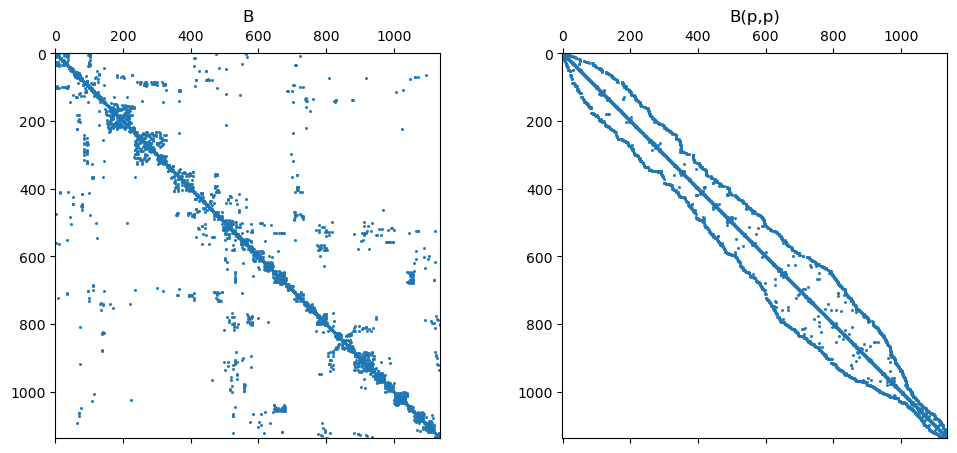

In [20]:
import scipy.io
import numpy as np
from scipy.sparse.csgraph import reverse_cuthill_mckee
import matplotlib.pyplot as plt

# Load the matrix from the MAT file
mat_data = scipy.io.loadmat('C:\\Users\\shrut\\OneDrive\\Desktop\\1138_bus.mat')
B = mat_data['Problem']['A'][0, 0]

# Visualize the original matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.spy(B, markersize=1)
plt.title('B')

# Perform symmetric reverse Cuthill-McKee (RCM) reordering
p = reverse_cuthill_mckee(B)
R = B[:, p][p, :]

# Visualize the reordered matrix
plt.subplot(1, 2, 2)
plt.spy(R, markersize=1)
plt.title('B(p,p)')

# Find non-zero elements in the original matrix
i, j = B.nonzero()
# Compute bandwidth of the original matrix
bw = max(i - j) + 1
print(f"Bandwidth of the original matrix: {bw}")

plt.show()


## 5. Create sparse matrices of size 5000 by 5000 with different levels of sparsity – 10%, 20% and 50%. Compute the time taken by the following algorithms to solve Ax = b, where A is a sparse matrix, and b is a random vector.

### a. Cholesky factorization

In [5]:
import numpy as np
from scipy.sparse import random, diags
from scipy.sparse.linalg import spsolve
from scipy.linalg import cholesky
from time import time

def generate_sparse_positive_definite(size, sparsity):
    density = sparsity / 100.0
    diagonals = np.random.rand(size)
    A = diags(diagonals, 0, format='csr')
    return A

sparsematrix10=generate_sparse_positive_definite(5000, 10)
sparsematrix20=generate_sparse_positive_definite(5000, 20)
sparsematrix50=generate_sparse_positive_definite(5000, 50)

try:
    start_time = time()
    L = cholesky(sparsematrix10.toarray(), lower=True)
    b = np.random.rand(5000)
    x = np.linalg.solve(L.T, np.linalg.solve(L, b))
    end_time = time()
    elapsed_time = end_time - start_time
    print(f"Sparsity:10%, Time taken for Cholesky factorization: {elapsed_time:.4f} seconds")
except np.linalg.LinAlgError as e:
    print(f"Sparsity:10%, Cholesky factorization failed: {e}")

try:
    start_time = time()
    L = cholesky(sparsematrix20.toarray(), lower=True)
    b = np.random.rand(5000)
    x = np.linalg.solve(L.T, np.linalg.solve(L, b))
    end_time = time()
    elapsed_time = end_time - start_time
    print(f"Sparsity:20%, Time taken for Cholesky factorization: {elapsed_time:.4f} seconds")
except np.linalg.LinAlgError as e:
    print(f"Sparsity:20%, Cholesky factorization failed: {e}")

try:
    start_time = time()
    L = cholesky(sparsematrix50.toarray(), lower=True)
    b = np.random.rand(5000)
    x = np.linalg.solve(L.T, np.linalg.solve(L, b))
    end_time = time()
    elapsed_time = end_time - start_time
    print(f"Sparsity:50%, Time taken for Cholesky factorization: {elapsed_time:.4f} seconds")
except np.linalg.LinAlgError as e:
    print(f"Sparsity:50%, Cholesky factorization failed: {e}")

Sparsity:10%, Time taken for Cholesky factorization: 116.1264 seconds
Sparsity:20%, Time taken for Cholesky factorization: 120.2594 seconds
Sparsity:50%, Time taken for Cholesky factorization: 84.5311 seconds


### b. LU decomposition

In [3]:
import numpy as np
from scipy.sparse import random
from scipy.sparse.linalg import splu
from scipy.sparse.linalg import spsolve
from time import time

# Function to generate sparse matrices of specific size and sparsity
def generate_sparse_matrix(size, sparsity):
    density = sparsity / 100.0
    return random(size, size, density=density, format='csr')

# Define matrix size
matrix_size = 5000

# Generate random vector b
vector_b = np.random.rand(matrix_size)

# Iterate over different sparsity levels (10%, 20%, and 50%)
sparsity_levels = [10, 20, 50]

for sparsity in sparsity_levels:
    sparse_matrix = generate_sparse_matrix(matrix_size, sparsity)
    
    # Perform LU decomposition
    lu_decomp = splu(sparse_matrix)
    
    # Measure time taken by solving Ax = b using LU decomposition
    start_time = time()
    x = lu_decomp.solve(vector_b)
    end_time = time()
    
    time_taken = end_time - start_time
    print(f"Sparsity: {sparsity}%, Time taken by LU decomposition: {time_taken} seconds")

D:\Anaconda\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:394: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Sparsity: 10%, Time taken by LU decomposition: 0.03130626678466797 seconds
Sparsity: 20%, Time taken by LU decomposition: 0.03198838233947754 seconds
Sparsity: 50%, Time taken by LU decomposition: 0.05016517639160156 seconds


### c. QR decomposition 

In [2]:
import numpy as np
from scipy.sparse import random
from scipy.linalg import qr as dense_qr
from scipy.sparse.linalg import spsolve
from time import time

# Function to generate sparse matrices of specific size and sparsity
def generate_sparse_matrix(size, sparsity):
    density = sparsity / 100.0
    return random(size, size, density=density, format='csr')

# Define matrix size
matrix_size = 5000

# Generate random vector b
vector_b = np.random.rand(matrix_size)

# Iterate over different sparsity levels (10%, 20%, and 50%)
sparsity_levels = [10, 20, 50]

for sparsity in sparsity_levels:
    sparse_matrix = generate_sparse_matrix(matrix_size, sparsity)
    
    # Convert sparse matrix to a dense matrix for QR decomposition
    dense_matrix = sparse_matrix.todense()
    
    # Perform QR decomposition for dense matrix
    Q, R = dense_qr(dense_matrix)
    
    # Measure time taken by solving Ax = b using QR decomposition
    start_time = time()
    x = spsolve(R, Q.T.dot(vector_b))
    end_time = time()
    
    time_taken = end_time - start_time
    print(f"Sparsity: {sparsity}%, Time taken by QR decomposition: {time_taken} seconds")

D:\Anaconda\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Sparsity: 10%, Time taken by QR decomposition: 0.6800682544708252 seconds
Sparsity: 20%, Time taken by QR decomposition: 0.6186895370483398 seconds
Sparsity: 50%, Time taken by QR decomposition: 0.590721845626831 seconds


### d. Singular Value Decomposition

In [1]:
import numpy as np
from scipy.sparse import random
from scipy.sparse.linalg import svds
from time import time

# Function to generate sparse matrices of specific size and sparsity
def generate_sparse_matrix(size, sparsity):
    density = sparsity / 100.0
    return random(size, size, density=density, format='csr')

# Define matrix size
matrix_size = 5000

# Generate random vector b
vector_b = np.random.rand(matrix_size)

# Iterate over different sparsity levels (10%, 20%, and 50%)
sparsity_levels = [10, 20, 50]

for sparsity in sparsity_levels:
    sparse_matrix = generate_sparse_matrix(matrix_size, sparsity)
    
    # Perform Singular Value Decomposition
    start_time = time()
    U, S, Vt = svds(sparse_matrix)
    end_time = time()
    
    # Reconstruct the original matrix from SVD
    reconstructed_matrix = U.dot(np.diag(S).dot(Vt))
    
    # Measure time taken by solving Ax = b using the reconstructed matrix
    start_time_solve = time()
    x = np.linalg.solve(reconstructed_matrix, vector_b)
    end_time_solve = time()
    
    time_taken = end_time - start_time + (end_time_solve - start_time_solve)
    print(f"Sparsity: {sparsity}%, Time taken by SVD: {time_taken} seconds")

Sparsity: 10%, Time taken by SVD: 1.9337353706359863 seconds
Sparsity: 20%, Time taken by SVD: 2.8792316913604736 seconds
Sparsity: 50%, Time taken by SVD: 7.519641399383545 seconds
